In [1]:
import sympy as sp
from sympy import diff, symbols, Function, expand, solve, powsimp, cancel, Poly, Subs, simplify, factor, nroots, ratsimp
from sympy.matrices import Matrix
from sympy.series.formal import Coeff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm  # tqdm displays the progress bar

# Спектр МУВ в ферромагнетике с кубичекой кристалличекой решеткой. 
Внешнее магнитное поле напралено произвольно
## Энергия ферромагнетика в лаборатоной СК (оси кубичеккого кристалла)

In [2]:
c11, c12, c44, b1, b2, ro = symbols('c_{11} c_{12} c_{44} b_1 b_2 rho')
al, ge = symbols('alpha g_e')
A_ex, Ka, M0, H0, Ha = symbols('A_{ex} K_a M_0 H_0 H_a')

x, y, z, t = symbols('x y z t')
Ux, Uy, Uz = Function('U_x')(x,y,z,t), Function('U_y')(x,y,z,t), Function('U_z')(x,y,z,t)

e0xx, e0yy, e0zz, e0xy, e0yz, e0xz = symbols('e_{0xx} e_{0yy} e_{0zz} e_{0xy} e_{0yz} e_{0xz}')
exx, eyy, ezz, exy, eyz, exz = symbols('e_{xx} e_{yy} e_{zz} e_{xy} e_{yz} e_{xz}')

M0x, M0y, M0z = symbols('M_{0x} M_{0y} M_{0z}')
Mx, My, Mz = Function('M_x')(x,y,z,t), Function('M_y')(x,y,z,t), Function('M_z')(x,y,z,t)
M = Matrix([Mx, My, Mz])

# Углы внешнего магн поля и q в лабораторной ск
tH, fH = symbols('t_H f_H')
tq, fq = symbols('t_q f_q')

# Hx, Hy, Hz = 
H = H0*Matrix([sp.sin(tH)*sp.cos(fH), sp.sin(tH)*sp.sin(fH), sp.cos(tH)])

In [3]:
W_ex = A_ex/M0**2*(M.diff(x).dot(M.diff(x)) + M.diff(y).dot(M.diff(y)) + M.diff(z).dot(M.diff(z)))
W_m = W_ex + Ka/M0**4*((Mx*My)**2 + (Mx*Mz)**2 + (Mz*My)**2) - M.dot(H)
W_e = 0.5*(eyy**2 + exx**2 + ezz**2)*c11 + (exx*eyy + exx*ezz + eyy*ezz)*c12 + 2*(exy**2 + eyz**2 + exz**2)*c44
W_me = (Mx**2*exx + My**2*eyy + Mz**2*ezz)*b1/M0**2 + 2*(Mx*My*exy + My*Mz*eyz + Mz*Mx*exz)*b2/M0**2
W = W_e + W_m + W_me
# expand(W)

## Равновесное значние энергии. Перенормировка энергии

In [4]:
W2=W.subs([(exx,e0xx+exx),(eyy,e0yy+eyy),(ezz,e0zz+ezz),(exy,e0xy+exy),(exz,e0xz+exz),(eyz,e0yz+eyz)])
W2=W2.subs([(Mx,M0x+Mx),(My,M0y+My),(Mz,M0z+Mz)])

ss = [(exx,0),(eyy,0),(ezz,0),(exy,0),(exz,0),(eyz,0), (Mx,0),(My,0),(Mz,0)]
f1 = expand(W2.diff(Mx).subs(ss))
f2 = expand(W2.diff(My).subs(ss))
f3 = expand(W2.diff(Mz).subs(ss))
f4 = expand(W2.diff(exx).subs(ss))
f5 = expand(W2.diff(eyy).subs(ss))
f6 = expand(W2.diff(ezz).subs(ss))
f7 = expand(W2.diff(exy).subs(ss))
f8 = expand(W2.diff(exz).subs(ss))
f9 = expand(W2.diff(eyz).subs(ss))

In [5]:
sol = solve([f4,f5,f6,f7,f8,f9],[e0xx,e0yy,e0zz,e0xy,e0yz,e0xz])
e0xx_, e0yy_, e0zz_, e0xy_, e0yz_, e0xz_ = sol[e0xx], sol[e0yy], sol[e0zz], sol[e0xy], sol[e0yz], sol[e0xz]

Значения равновесных $e^0_{ij}$

In [6]:
e0 = Matrix([e0xx_, e0yy_, e0zz_, e0xy_, e0yz_, e0xz_])
simplify(e0)

Matrix([
[b_1*(-M_{0x}**2*c_{11} - M_{0x}**2*c_{12} + M_{0y}**2*c_{12} + M_{0z}**2*c_{12})/(M_0**2*(c_{11}**2 + c_{11}*c_{12} - 2.0*c_{12}**2))],
[ b_1*(M_{0x}**2*c_{12} - M_{0y}**2*c_{11} - M_{0y}**2*c_{12} + M_{0z}**2*c_{12})/(M_0**2*(c_{11}**2 + c_{11}*c_{12} - 2.0*c_{12}**2))],
[ b_1*(M_{0x}**2*c_{12} + M_{0y}**2*c_{12} - M_{0z}**2*c_{11} - M_{0z}**2*c_{12})/(M_0**2*(c_{11}**2 + c_{11}*c_{12} - 2.0*c_{12}**2))],
[                                                                                               -0.5*M_{0x}*M_{0y}*b_2/(M_0**2*c_{44})],
[                                                                                               -0.5*M_{0y}*M_{0z}*b_2/(M_0**2*c_{44})],
[                                                                                               -0.5*M_{0x}*M_{0z}*b_2/(M_0**2*c_{44})]])

In [7]:
exx, eyy, ezz = e0xx + Ux.diff(x), e0yy + Uy.diff(y), e0zz + Uz.diff(z)
exy, eyz, exz = e0xy + 0.5*(Ux.diff(y) + Uy.diff(x)), e0yz + 0.5*(Uy.diff(z) + Uz.diff(y)), e0xz + 0.5*(Ux.diff(z) + Uz.diff(x))

vvv = [('e_{xx}',exx), ('e_{yy}',eyy), ('e_{zz}',ezz), ('e_{xz}',exz), ('e_{xy}',exy), ('e_{yz}',eyz)]
W1 = W.subs(vvv)

##  Уравнения движения магнитного момента и упругих смещений
Эффективное магн поле $ \mathbf{H}_{eff} = -\dfrac{δ W}{δ \mathbf{M}} = -\dfrac{∂ W}{∂ \mathbf{M}} + ∑_k \dfrac{∂}{∂ x_k}\left( \dfrac{∂ W}{∂\left( \frac{\mathbf{M}}{∂ x_k} \right)} \right)$

In [8]:
Heff_x = -W1.diff(Mx) + (W1.diff(Mx.diff(x)).diff(x) + W1.diff(Mx.diff(y)).diff(y) + W1.diff(Mx.diff(z)).diff(z))
Heff_y = -W1.diff(My) + (W1.diff(My.diff(x)).diff(x) + W1.diff(My.diff(y)).diff(y) + W1.diff(My.diff(z)).diff(z))
Heff_z = -W1.diff(Mz) + (W1.diff(Mz.diff(x)).diff(x) + W1.diff(Mz.diff(y)).diff(y) + W1.diff(Mz.diff(z)).diff(z))

Heff = Matrix([Heff_x, Heff_y, Heff_z])
# Heff

Вектор $\dot{\mathbf{M}} + γ_e[\mathbf{M},\mathbf{H}_{eff}] - \dfrac{α}{M_0}[\mathbf{M},\dot{\mathbf{M}}] \,\,\, (=0)$

In [9]:
Magn = M.diff(t) + ge*M.cross(Heff) - al/M0*M.cross(M.diff(t))

Вектор $∑_k \dfrac{∂ σ_{ik}}{∂ x_{k}} - ρ\ddot{u}_i \,\,\,\,\, (=0)$, $σ_{ik} = \dfrac{∂ W}{∂ e_{ik}}$

In [10]:
elast_x = (W1.diff(Ux.diff(x))).diff(x) + (W1.diff(Ux.diff(y))).diff(y) + (W1.diff(Ux.diff(z))).diff(z) - ro*Ux.diff(t,2)
elast_y = (W1.diff(Uy.diff(x))).diff(x) + (W1.diff(Uy.diff(y))).diff(y) + (W1.diff(Uy.diff(z))).diff(z) - ro*Uy.diff(t,2)
elast_z = (W1.diff(Uz.diff(x))).diff(x) + (W1.diff(Uz.diff(y))).diff(y) + (W1.diff(Uz.diff(z))).diff(z) - ro*Uz.diff(t,2)

Elast = expand( - Matrix([elast_x, elast_y, elast_z])/ro)
# Elast

### Ищем решения в виде плоских волн

In [11]:
w, q = symbols('w q')
mx, my, mz = symbols('m_x m_y m_z')
ux, uy, uz = symbols('u_x u_y u_z')

qx, qy, qz = q*sp.sin(tq)*sp.cos(fq), q*sp.sin(tq)*sp.sin(fq), q*sp.cos(tq)

qv = Matrix([qx, qy, qz])
r = Matrix([x, y, z])

# Пусть равновесная намагниченность сонаправлена с внешним магн. полем
M0x, M0y, M0z = M0*sp.sin(tH)*sp.cos(fH), M0*sp.sin(tH)*sp.sin(fH), M0*sp.cos(tH)

Mr = Matrix([M0x, M0y, M0z]) + Matrix([mx, my, mz])*sp.exp(1j*(qv.dot(r)-w*t))
Ur = Matrix([ux, uy, uz])*sp.exp(1j*(qv.dot(r)-w*t))

vv = [(Mx,Mr[0]), (My,Mr[1]), (Mz,Mr[2]), (Ux,Ur[0]), (Uy,Ur[1]), (Uz,Ur[2])]

Magn_q = expand(Magn.subs(vv).doit())
Elast_q = expand(Elast.subs(vv).doit())

Вектор $\left\lbrace \dot{\mathbf{M}} + γ_e[\mathbf{M},\mathbf{H}_{eff}] -  \dfrac{α}{M_0}[\mathbf{M},\dot{\mathbf{M}}] \right\rbrace \,\,\, (= 0) $ в линейном приближении по $m_x,m_y,m_z$ и $u_x,u_y,u_z$ *exp(-iqr): 

In [12]:
Magn_q_lin = Magn_q.subs([(sp.exp(-2j*w*t),0), (sp.exp(-3j*w*t),0), (sp.exp(-4j*w*t),0)])
Magn_q_lin = powsimp(expand(Magn_q_lin*sp.exp(-1j*(qv.dot(r)-w*t))), force=True)

Вектор $ \left\lbrace ρ\ddot{u}_i - ∑_k \dfrac{∂ σ_{ik}}{∂ x_{k}} \right\rbrace \,\,\, (= 0)$ в линейном приближении по $m_x,m_y,m_z$ и $u_x,u_y,u_z$ *exp(-iqr):

In [13]:
Elast_q_lin = Elast_q.subs([(sp.exp(-2j*w*t),0), (sp.exp(-3j*w*t),0), (sp.exp(-4j*w*t),0)])
Elast_q_lin = powsimp(expand(Elast_q_lin*sp.exp(-1j*(qv.dot(r)-w*t))), force=True)

### Формируем матрицу 6x6. 

Столбцы: $u_x,u_y,u_z, m_x,m_y,m_z$.

Строки: первые три строки - $x,y,z$ компонеты ур-я для $\mathbf{u}$;
последние три - $x,y,z$ компонеты ур-я для $\mathbf{m}$.

Элементы матрицы 'Matr'

In [14]:
M11 = Poly(Elast_q_lin[0], ux).coeff_monomial(ux)
M12 = Poly(Elast_q_lin[0], uy).coeff_monomial(uy)
M13 = Poly(Elast_q_lin[0], uz).coeff_monomial(uz)
M14 = Poly(Elast_q_lin[0], mx).coeff_monomial(mx)
M15 = Poly(Elast_q_lin[0], my).coeff_monomial(my)
M16 = Poly(Elast_q_lin[0], mz).coeff_monomial(mz)

M21 = Poly(Elast_q_lin[1], ux).coeff_monomial(ux)
M22 = Poly(Elast_q_lin[1], uy).coeff_monomial(uy)
M23 = Poly(Elast_q_lin[1], uz).coeff_monomial(uz)
M24 = Poly(Elast_q_lin[1], mx).coeff_monomial(mx)
M25 = Poly(Elast_q_lin[1], my).coeff_monomial(my)
M26 = Poly(Elast_q_lin[1], mz).coeff_monomial(mz)

M31 = Poly(Elast_q_lin[2], ux).coeff_monomial(ux)
M32 = Poly(Elast_q_lin[2], uy).coeff_monomial(uy)
M33 = Poly(Elast_q_lin[2], uz).coeff_monomial(uz)
M34 = Poly(Elast_q_lin[2], mx).coeff_monomial(mx)
M35 = Poly(Elast_q_lin[2], my).coeff_monomial(my)
M36 = Poly(Elast_q_lin[2], mz).coeff_monomial(mz)

M41 = Poly(Magn_q_lin[0], ux).coeff_monomial(ux)
M42 = Poly(Magn_q_lin[0], uy).coeff_monomial(uy)
M43 = Poly(Magn_q_lin[0], uz).coeff_monomial(uz)
M44 = Poly(Magn_q_lin[0], mx).coeff_monomial(mx)
M45 = Poly(Magn_q_lin[0], my).coeff_monomial(my)
M46 = Poly(Magn_q_lin[0], mz).coeff_monomial(mz)

M51 = Poly(Magn_q_lin[1], ux).coeff_monomial(ux)
M52 = Poly(Magn_q_lin[1], uy).coeff_monomial(uy)
M53 = Poly(Magn_q_lin[1], uz).coeff_monomial(uz)
M54 = Poly(Magn_q_lin[1], mx).coeff_monomial(mx)
M55 = Poly(Magn_q_lin[1], my).coeff_monomial(my)
M56 = Poly(Magn_q_lin[1], mz).coeff_monomial(mz)

M61 = Poly(Magn_q_lin[2], ux).coeff_monomial(ux)
M62 = Poly(Magn_q_lin[2], uy).coeff_monomial(uy)
M63 = Poly(Magn_q_lin[2], uz).coeff_monomial(uz)
M64 = Poly(Magn_q_lin[2], mx).coeff_monomial(mx)
M65 = Poly(Magn_q_lin[2], my).coeff_monomial(my)
M66 = Poly(Magn_q_lin[2], mz).coeff_monomial(mz)

In [15]:
# Матрица 'Matr' 6x6
Matr = Matrix([[M11,M12,M13,M14,M15,M16],
               [M21,M22,M23,M24,M25,M26],
               [M31,M32,M33,M34,M35,M36],
               [M41,M42,M43,M44,M45,M46],
               [M51,M52,M53,M54,M55,M56],
               [M61,M62,M63,M64,M65,M66]])

In [16]:
ss = [('e_{0xx}',e0xx_), ('e_{0yy}',e0yy_), ('e_{0zz}',e0zz_), ('e_{0xz}',e0xz_), ('e_{0xy}',e0xy_), ('e_{0yz}',e0yz_)]
m0 = [('M_{0x}',M0x), ('M_{0y}',M0y), ('M_{0z}',M0z)]

Matr = Matr.subs(ss).subs(m0)

In [17]:
Matr

Matrix([
[                                                                                                       1.0*c_{11}*q**2*sin(t_q)**2*cos(f_q)**2/rho + 1.0*c_{44}*q**2*sin(f_q)**2*sin(t_q)**2/rho + 1.0*c_{44}*q**2*cos(t_q)**2/rho - 1.0*w**2,                                                                                                                                          1.0*c_{12}*q**2*sin(f_q)*sin(t_q)**2*cos(f_q)/rho + 1.0*c_{44}*q**2*sin(f_q)*sin(t_q)**2*cos(f_q)/rho,                                                                                                                                    1.0*c_{12}*q**2*sin(t_q)*cos(f_q)*cos(t_q)/rho + 1.0*c_{44}*q**2*sin(t_q)*cos(f_q)*cos(t_q)/rho,                                                                                                                                                                                                                                                                                            

## Определитель 6х6 в символьном виде

In [17]:
from Determinant6 import Determinant6v6
X = Matrix(sp.MatrixSymbol('X', 6, 6))
#Xd = X.det()
Xd = Determinant6v6(X)

### Константы для Fe$_{82}$Ga$_{18}$

In [18]:
from Parameters import Const

cnst = Const(0.18)
cnst

{'mb': 9.27400968e-21,
 'hp': 1.054571817e-27,
 'g': 2.05,
 'ge': 18027904.34707777,
 'Ka': -80000.0,
 'ro': 7.5905,
 'a0': 2.8999992719999997e-08,
 'c11': 2086220397359.9995,
 'c12': 1672968839999.9998,
 'c44': 1252638503999.9998,
 'M0': 1358.315664,
 'A': 8.9092308e-07,
 'b1': -132027099.99999996,
 'b2': -54979528.84000003,
 'al': 0.001}


## Строим кривые постоянной энергии, кривизны и коэф.усиления МУВ $q = q^λ_\omega(\theta_q)$

In [19]:
# Направление магн поля
tH, fH = np.arctan(np.sqrt(2)), np.pi/4

H0 = 3e3
w = cnst['ge']*H0*1.03

sub = {'c_{11}': cnst['c11'], 'c_{12}': cnst['c12'], 'c_{44}': cnst['c44'], 'b_1': cnst['b1'], 'b_2': cnst['b2'],
          'rho': cnst['ro'], 'g_e': cnst['ge'], 'A_{ex}': cnst['A'], 'K_a': cnst['Ka'], 'M_0': cnst['M0'],
          'alpha': cnst['al'], 't_H': tH, 'f_H': fH, 'H_0': H0, 'w': w}

Matr1 = Matr.subs(sub)

Det = Xd
for i in range(6):
    for j in range(6):
        Det = Det.subs(X[i,j], Matr1[i,j])
Det = expand(Det)

Производные определителя

In [28]:
Gq, Gt, Gf = Det.diff(q), Det.diff(tq), Det.diff(fq)
Gqq, Gtt, Gff = Gq.diff(q), Gt.diff(tq), Gf.diff(fq)
Gtf, Gqt, Gqf = Gt.diff(fq), Gq.diff(tq), Gq.diff(fq)

Gq, Gqq, Gt, Gtt, Gf, Gff = Gq.subs(sub), Gqq.subs(sub), Gt.subs(sub), Gtt.subs(sub), Gf.subs(sub), Gff.subs(sub)
Gtf, Gqt, Gqf = Gtf.subs(sub), Gqt.subs(sub), Gqf.subs(sub)

# G...- Функции от q, tq, fq

ValueError: 
Can't calculate derivative wrt 0.00100000000000000.

Кривизна и кэф.усиления

In [21]:
from Curvature_Htau import Curv
# Curv(Gq, Gt, Gf, Gqq, Gtt, Gff, Gtf, Gqt, Gqf, q, tq, fq):
    # G...- Функции от q, tq, fq

In [22]:
#  Направление волнового вектора
fq = np.pi/4
tq = np.linspace(1e-3, np.pi/2, 500)

Det = Det.subs(sub).subs('f_q', fq)

q_num = np.zeros((len(tq),4), dtype=np.complex128)
Curvature = np.zeros((len(tq),4), dtype=np.complex128)
Ampl = np.zeros((len(tq),4), dtype=np.complex128)

for i in tqdm(range(len(tq)), desc= 'Progress tq'):      # "tqdm" display the progress bar
    Det_ = Det.subs('t_q',tq[i])    
    DetM_pol = Poly(Det_)
    coef_ = DetM_pol.all_coeffs()
    coef = []
    [coef.append(complex(kk)) for kk in coef_]  
    rts = np.roots(coef) # Поиск корней полинома 
        
    rts = rts[np.where((np.real(rts) > 0) & (np.real(rts)<1e10) & (np.real(rts)>np.imag(rts)))]           
    if len(rts) < 4: rts = np.append(rts, np.zeros(4 - len(rts)))
    
    q_num[i,:] = np.sort_complex(rts)[::-1] # сортировка по убыванию
    
    for j in range(4):
        Vals = Curv(Gq, Gt, Gf, Gqq, Gtt, Gff, Gtf, Gqt, Gqf, q_num[i,j], tq[i], fq)
        Curvature[i,j] = Vals['Curvature']
        Ampl[i,j] = Vals['Ampl']
    
    
q_re = np.real(q_num)
q_im = np.imag(q_num)

Progress tq: 100%|██████████████████████████| 500/500 [1:08:49<00:00,  8.26s/it]


## Отсутствие МУ взаимодействия $b_1 = b_2 = 0$

In [24]:
# Направление магн поля
tH, fH = np.arctan(np.sqrt(2)), np.pi/4

sub = {'c_{11}': cnst['c11'], 'c_{12}': cnst['c12'], 'c_{44}': cnst['c44'], 
       'b_1': 0, 'b_2': 0, 
       'rho': cnst['ro'], 'g_e': cnst['ge'], 'A_{ex}': cnst['A'], 'K_a': cnst['Ka'], 'M_0': cnst['M0'],
       'alpha': cnst['al'], 't_H': tH, 'f_H': fH, 'H_0': H0, 'w': w}

Matr2 = Matr.subs(sub)

Det0 = Xd
for i in range(6):
    for j in range(6):
        Det0 = Det0.subs(X[i,j], Matr2[i,j])
Det0 = expand(Det0)

Производные определителя

In [25]:
q, tq, fq = symbols('q t_q f_q')

Gq, Gt, Gf = Det0.diff(q), Det0.diff(tq), Det0.diff(fq)
Gqq, Gtt, Gff = Gq.diff(q), Gt.diff(tq), Gf.diff(fq)
Gtf, Gqt, Gqf = Gt.diff(fq), Gq.diff(tq), Gq.diff(fq)

Gq, Gqq, Gt, Gtt, Gf, Gff = Gq.subs(sub), Gqq.subs(sub), Gt.subs(sub), Gtt.subs(sub), Gf.subs(sub), Gff.subs(sub)
Gtf, Gqt, Gqf = Gtf.subs(sub), Gqt.subs(sub), Gqf.subs(sub)

# G...- Функции от q, tq, fq

Кривизна и кэф.усиления

In [26]:
#  Направление волнового вектора
fq = np.pi/4
tq = np.linspace(1e-3, np.pi/2, 500)

Det0 = Det0.subs(sub).subs('f_q', fq)

q_num0 = np.zeros((len(tq),4), dtype=np.complex128)
Curvature0 = np.zeros((len(tq),4), dtype=np.complex128)
Ampl0 = np.zeros((len(tq),4), dtype=np.complex128)

for i in tqdm(range(len(tq)), desc= 'Progress tq'):      # "tqdm" display the progress bar
    Det_ = Det0.subs('t_q',tq[i])    
    DetM_pol = Poly(Det_)
    coef_ = DetM_pol.all_coeffs()
    coef = []
    [coef.append(complex(kk)) for kk in coef_]  
    rts = np.roots(coef) # Поиск корней полинома 
        
    rts = rts[np.where((np.real(rts) > 0) & (np.real(rts)<1e10) & (np.real(rts)>np.imag(rts)))]           
    if len(rts) < 4: rts = np.append(rts, np.zeros(4 - len(rts)))
    
    q_num0[i,:] = np.sort_complex(rts)[::-1] # сортировка по убыванию
    
    for j in range(4):
        Vals0 = Curv(Gq, Gt, Gf, Gqq, Gtt, Gff, Gtf, Gqt, Gqf, q_num[i,j], tq[i], fq)
        Curvature0[i,j] = Vals0['Curvature']
        Ampl0[i,j] = Vals0['Ampl']
    
    
q_re0 = np.real(q_num0)
q_im0 = np.imag(q_num0)

Progress tq: 100%|████████████████████████████| 500/500 [48:33<00:00,  5.83s/it]


In [23]:
import pandas as pd

dat = {'teta_q, rad': tq, 'q1_re, 1/cm': q_re[:,0], 'q2_re': q_re[:,1], 'q3_re': q_re[:,2], 'q4_re': q_re[:,3],
      'q1_im': q_im[:,0], 'q2_im': q_im[:,1], 'q3_im': q_im[:,2], 'q4_im': q_im[:,3],
      'K1_re, 1/cm^2': np.real(Curvature[:,0]), 'K2_re': np.real(Curvature[:,1]),'K3_re': np.real(Curvature[:,2]),'K4_re': np.real(Curvature[:,3]),
      'K1_im': np.imag(Curvature[:,0]), 'K2_im': np.imag(Curvature[:,1]),'K3_im': np.imag(Curvature[:,2]),'K4_im': np.imag(Curvature[:,3]),
      'A1': np.real(Ampl[:,0]), 'A2': np.real(Ampl[:,1]), 'A3': np.real(Ampl[:,2]), 'A4': np.real(Ampl[:,3])}
rez = pd.DataFrame(data=dat)

rez.to_csv('q_vs_tq',index=False)
rez

,"teta_q, rad","q1_re, 1/cm",q2_re,q3_re,q4_re,q1_im,q2_im,q3_im,q4_im,"K1_re, 1/cm^2",...,K3_re,K4_re,K1_im,K2_im,K3_im,K4_im,A1,A2,A3,A4
0,0.001000,139818.181868,137131.478662,121779.613736,74786.480161,791.545780,0.002476,3063.081678,9280.738178,5.723811e-10,...,5.840272e-09,-5.919413e-10,-2.196353e-08,-9.054214e-13,-6.187461e-08,3.252935e-09,0.002305,0.175139,0.001060,0.053099
1,0.004146,139760.794790,137137.184182,121856.882896,74768.614603,779.284260,0.002253,3080.062806,9275.642286,2.594302e-09,...,7.643837e-09,-4.289549e-11,-5.159744e-09,-2.004074e-12,-1.504948e-08,7.973709e-10,0.008806,0.164366,0.003923,0.219981
2,0.007292,139714.755815,137151.100053,121920.422267,74750.913001,768.727822,0.007327,3095.311694,9270.550811,2.865695e-09,...,8.227529e-09,3.240980e-11,-2.890436e-09,-5.176726e-12,-8.513552e-09,4.605577e-10,0.012535,0.169942,0.005620,0.380669
3,0.010438,139679.640536,137173.955138,121969.927773,74733.375741,760.030028,0.024779,3108.667578,9265.463834,2.991700e-09,...,8.615809e-09,6.232577e-11,-2.016031e-09,-1.143670e-11,-5.822561e-09,3.267369e-10,0.014177,0.200528,0.006423,0.528660
4,0.013584,139655.100420,137206.318045,122005.180563,74716.001724,753.318454,0.055814,3120.001864,9260.381191,3.102161e-09,...,8.868210e-09,7.838704e-11,-1.565497e-09,-2.214328e-11,-4.296337e-09,2.548733e-10,0.014742,0.298501,0.006797,0.659802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.558213,362316.522823,137678.408981,95582.283520,73779.751546,445.320420,88.887547,4461.392373,7832.003305,6.597849e-10,...,2.584843e-11,8.868346e-11,4.483715e-12,5.817391e-12,-6.140438e-11,4.998353e-11,0.011542,0.359529,1.619506,1.784724
496,1.561359,362336.211129,137626.365827,95629.764574,73774.563560,444.570871,82.593060,4477.456392,7824.225810,6.613002e-10,...,2.693434e-11,8.849620e-11,4.483718e-12,6.188410e-12,-6.216119e-11,4.957667e-11,0.011517,0.355095,1.592722,1.791442
497,1.564505,362337.473890,137579.667476,95675.218498,73769.695251,443.843296,76.479963,4493.230972,7816.542017,6.619780e-10,...,2.802095e-11,8.831021e-11,4.478314e-12,6.551191e-12,-6.289584e-11,4.918158e-11,0.011506,0.351045,1.567116,1.798056
498,1.567650,362320.295859,137538.336087,95718.624329,73765.144689,443.137584,70.556264,4508.710082,7808.949971,6.618139e-10,...,2.910685e-11,8.812529e-11,4.467506e-12,6.903699e-12,-6.360647e-11,4.879795e-11,0.011507,0.347373,1.542669,1.804569


## Plotting

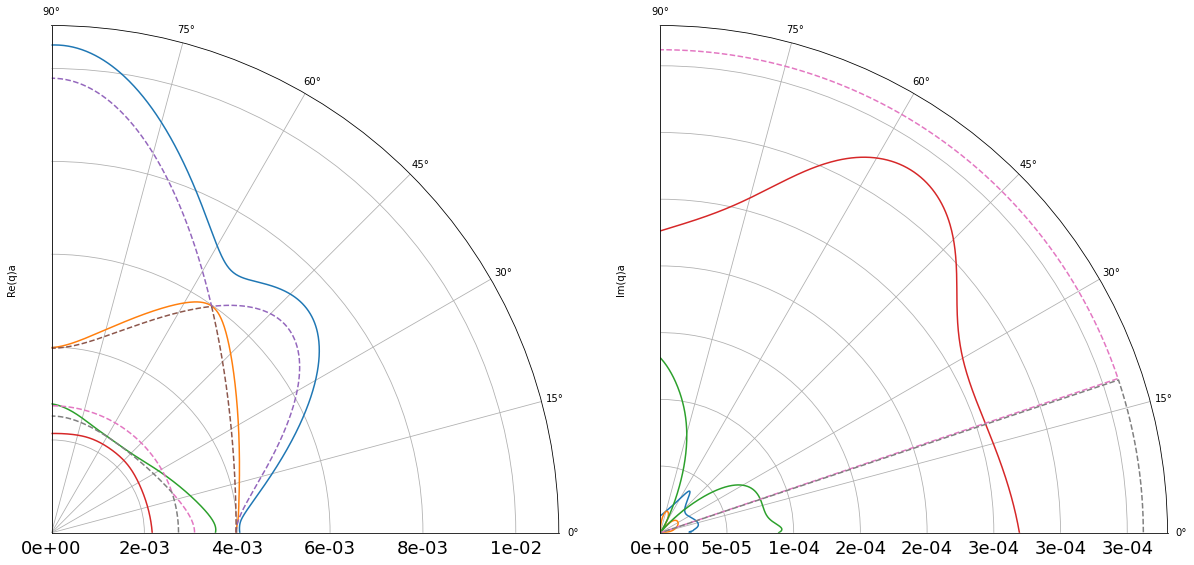

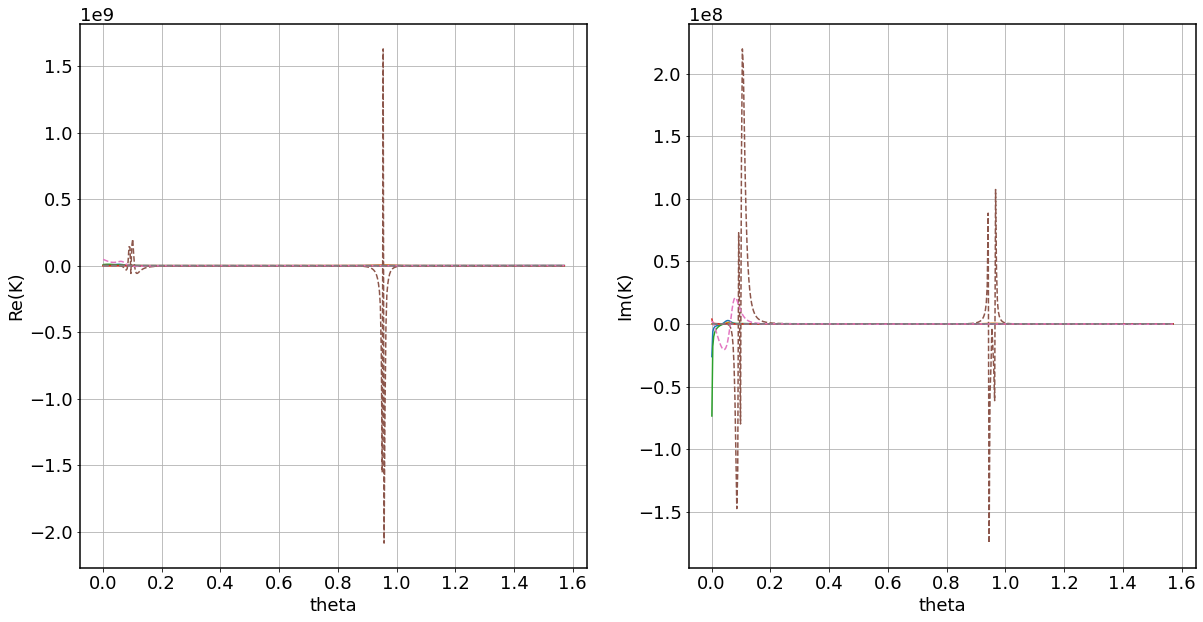

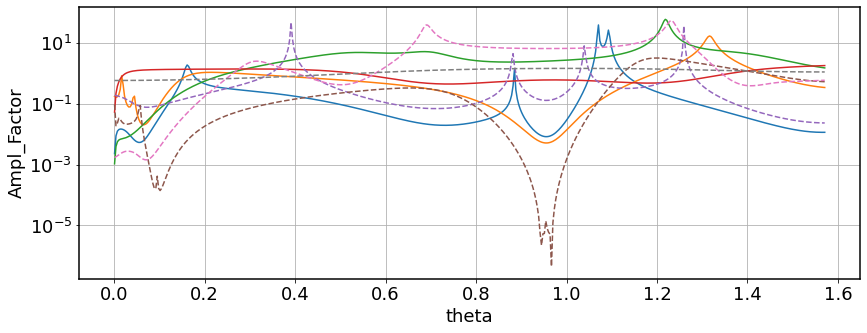

In [27]:
fig, ax = plt.subplots(1,2, figsize = (20,20), subplot_kw= {'projection': 'polar'})
ax[0].plot(tq, np.abs(q_re[:,:])*cnst['a0'], '-', tq, np.abs(q_re0[:,:])*cnst['a0'], '--')
ax[1].plot(tq, np.abs(q_im[:,:])*cnst['a0'], '-', tq, np.abs(q_im0[:,:])*cnst['a0'], '--')
ax[0].set(ylabel='Re(q)a'), ax[1].set(ylabel='Im(q)a')
ax[0].set_thetalim([0, np.pi/2]), ax[1].set_thetalim([0, np.pi/2])
ax[0].set_thetagrids([0, 15, 30, 45, 60, 75, 90]), ax[1].set_thetagrids([0, 15, 30, 45, 60, 75, 90])
ax[0].grid(True), ax[1].grid(True)
ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.0e}"))
ax[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.0e}"))
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.show()
ax[0].clear, ax[1].clear

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(tq, np.real(Curvature[:,:])/cnst['a0']**2, '-', tq, np.real(Curvature0[:,:])/cnst['a0']**2, '--')
ax[0].set(xlabel='theta', ylabel='Re(K)')
ax[0].grid()
ax[1].plot(tq, np.imag(Curvature[:,:])/cnst['a0']**2, '-', tq, np.imag(Curvature0[:,:])/cnst['a0']**2, '--')
ax[1].set(xlabel='theta', ylabel='Im(K)')
ax[1].grid()
plt.show()

fig, ax = plt.subplots(1,1, figsize=(14, 5))
ax.plot(tq, np.real(Ampl[:,:]), '-', tq, np.real(Ampl0[:,:]), '--')
ax.set(xlabel='theta', ylabel='Ampl_Factor')
ax.set_yscale('log')
ax.grid()
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.show()

vL111 = np.sqrt(c11/ro*(1+2/3*(c12+2*c44-c11)/c11))
vT111 = np.sqrt(c44/ro*(1-1/3*(c12+2*c44-c11)/c44))

vL110 = np.sqrt(c11/ro*(1+1/2*(c12+2*c44-c11)/c11))
vT110 = np.sqrt(c44/ro*(1-1/2*(c12+2*c44-c11)/c44))
vT100 = np.sqrt(c44/ro)